# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [192]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [193]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [194]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | siljan
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | tubmanburg
Processing Record 6 of Set 1 | sereflikochisar
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | rafai
Processing Record 9 of Set 1 | saint-joseph
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | antofagasta
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | sarangani
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | santa isabel do rio negro
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 1 | hambantota
Processing Record 22 of Set 1 | jalu
Processi

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,9.47,89,100,0.51,AU,1681759218
1,bentiu,9.2333,29.8333,29.24,53,100,3.00,SS,1681759232
2,huarmey,-10.0681,-78.1522,26.92,71,99,4.49,PE,1681759233
3,rikitea,-23.1203,-134.9692,26.30,82,100,6.48,PF,1681759233
4,ruston,32.5232,-92.6379,26.44,23,0,0.00,US,1681758639


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,9.47,89,100,0.51,AU,1681759218
1,bentiu,9.2333,29.8333,29.24,53,100,3.00,SS,1681759232
2,huarmey,-10.0681,-78.1522,26.92,71,99,4.49,PE,1681759233
3,rikitea,-23.1203,-134.9692,26.30,82,100,6.48,PF,1681759233
4,ruston,32.5232,-92.6379,26.44,23,0,0.00,US,1681758639


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

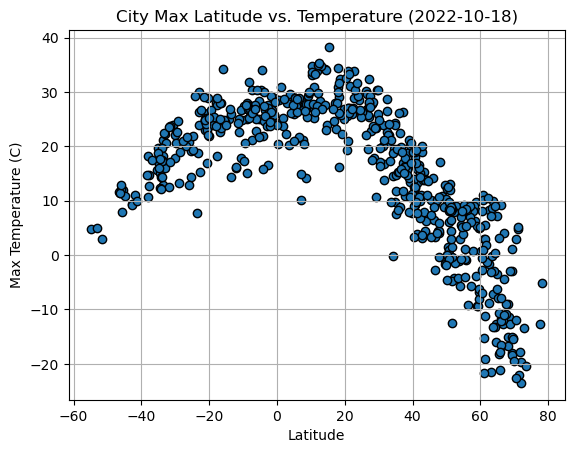

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolors= 'black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

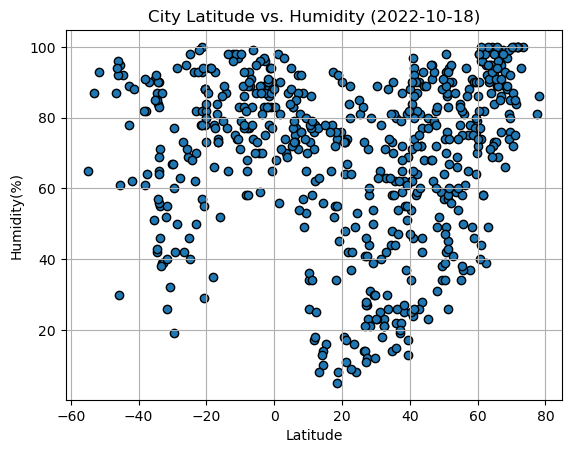

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolors= 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

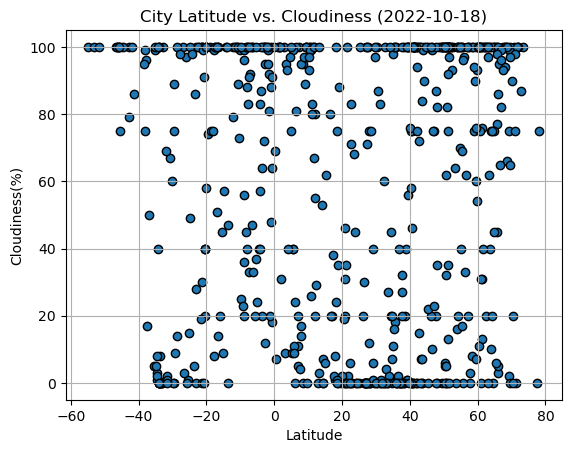

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolors= 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

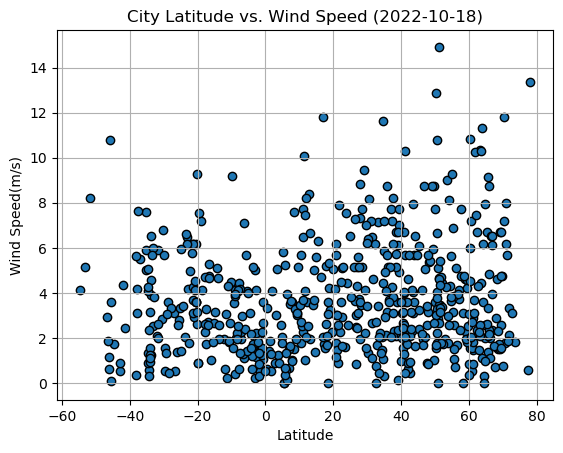

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolors= 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def lin_reg(x_values,y_values,x_label,y_label,location):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color="red")

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r square value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

                                                          

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bentiu,9.2333,29.8333,29.24,53,100,3.00,SS,1681759232
4,ruston,32.5232,-92.6379,26.44,23,0,0.00,US,1681758639
5,kermanshah,34.3142,47.0650,14.50,44,20,2.06,IR,1681759233
6,arlit,18.7369,7.3853,32.40,8,0,4.22,NE,1681759234
9,tabuk,17.4189,121.4443,23.26,93,38,1.71,PH,1681759234


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,9.47,89,100,0.51,AU,1681759218
2,huarmey,-10.0681,-78.1522,26.92,71,99,4.49,PE,1681759233
3,rikitea,-23.1203,-134.9692,26.30,82,100,6.48,PF,1681759233
7,constitucion,-35.3333,-72.4167,15.62,51,5,7.58,CL,1681759234
8,hermanus,-34.4187,19.2345,15.85,84,1,0.58,ZA,1681759234


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7600135150140623


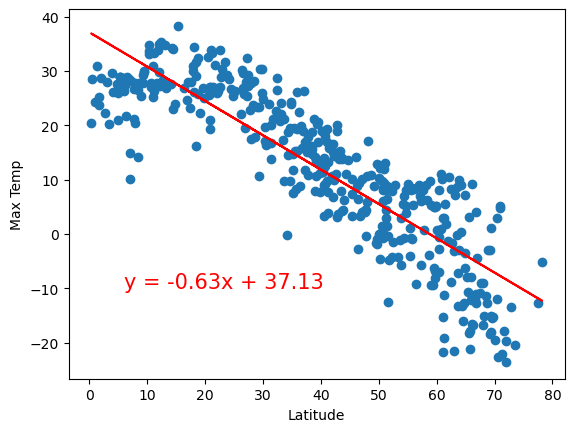

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = 'Latitude'
y_label = 'Max Temp'
location = (6,-10)
lin_reg(x_values,y_values,x_label,y_label,location)

The r-value is: 0.5604349273008364


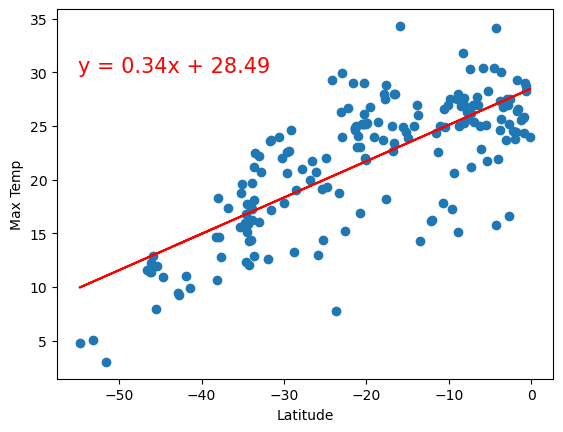

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = 'Latitude'
y_label = 'Max Temp'
location = (-55,30)
lin_reg(x_values,y_values,x_label,y_label,location)

**Discussion about the linear relationship:** There is a strong linear relationship between latitude and max temperature in both the northern and southern hemisphere. In the northern hemisphere, as the latitude increases, the temperature drops. it is the vice versa in southern hemisphere. Northern hemisphere has stronger coorelation than southern.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1036972877923439


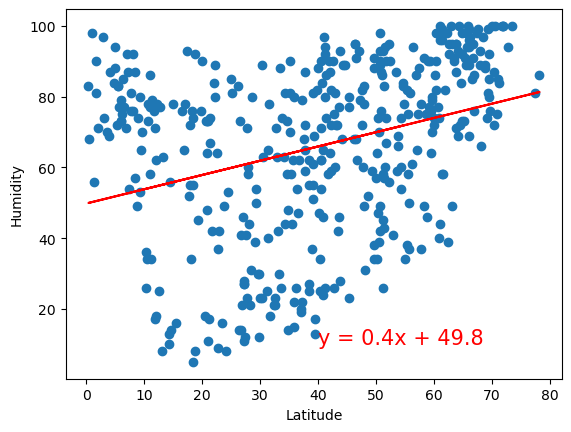

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = 'Latitude'
y_label = 'Humidity'
location = (40,10)
lin_reg(x_values,y_values,x_label,y_label,location)


The r-value is: 0.0724678246844836


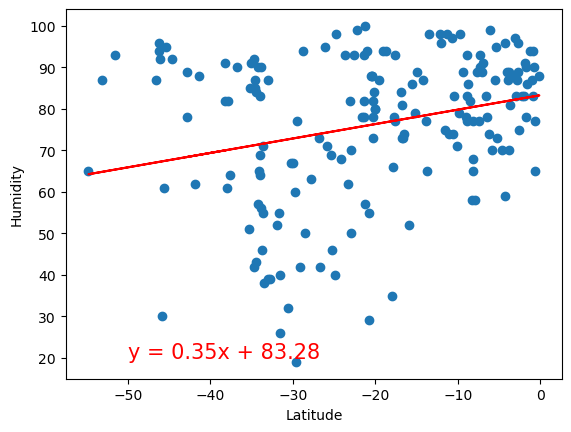

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = 'Latitude'
y_label = 'Humidity'
location = (-50,20)
lin_reg(x_values,y_values,x_label,y_label,location)

**Discussion about the linear relationship:** Low r score point to very low correlation between latitude and humidity. Northern hemisphere has slightly stronger coorelation than southern.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04960738125390117


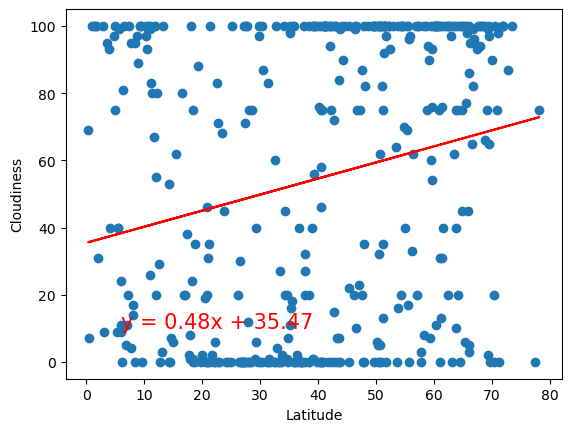

In [ ]:
# Northern Hemisphere
# store x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = 'Latitude'
y_label = 'Cloudiness'
location = (6,10)
lin_reg(x_values,y_values,x_label,y_label,location)

The r-value is: 0.014217878456352456


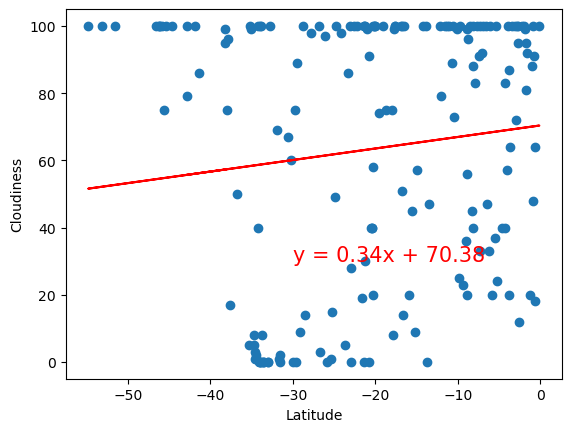

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = 'Latitude'
y_label = 'Cloudiness'
location = (-30,30)
lin_reg(x_values,y_values,x_label,y_label,location)

**Discussion about the linear relationship:** Northern hemisphere has decent coorelation between latitude and cloudiness. As the latitude increases, the cloudiness does too. Southern hemisphere on the other hand does not show such correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009397734312217342


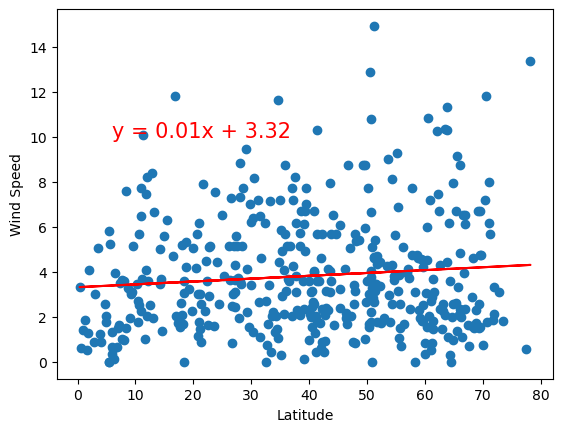

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = 'Latitude'
y_label = 'Wind Speed'
location = (6,10)
lin_reg(x_values,y_values,x_label,y_label,location)

The r-value is: 0.03868070330618527


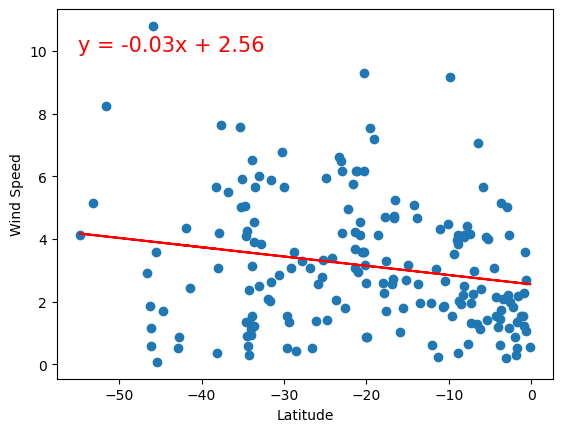

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = 'Latitude'
y_label = 'Wind Speed'
location = (-55,10)
lin_reg(x_values,y_values,x_label,y_label,location)

**Discussion about the linear relationship:** Northern hemisphere does not show any coorelation between latitude and wind speed. Southern hemisphere has higher correlation where windspeed decreases with latitude gain.